From Section 1.3:  
# PCA of images
Principal Component Analysis (PCA ) is a useful technique for dimensionality reduction and is optimal in the sense that it represents the variability of the training data with as few dimensions as possible. Even a tiny 100x100 pixel grayscale image has 10,000 dimensions, and can be considered a point in a 10,000 dimensional space. A megapixel image has dimensions in the millions. With such high dimensionality, it is no surprise that dimensionality reduction comes handy in many computer vision applications. The projection matrix resulting from PCA can be seen as a change of coordinates to a coordinate system where the coordinates are in descending order of importance.
To apply PCA on image data, the images need to be converted to a one-dimensional vector representation, for example using NumPy’s flatten() method.
The flattened images are collected in a single matrix by stacking them, one row for each image. The rows are then centered relative to the mean image before the computation of the dominant directions. To find the principal components, singular value decomposition (SVD) is usually used, but if the dimensionality is high, there is a useful trick that can be used instead since the SVD computation will be very slow in that case. Here is what it looks like in code.

In [6]:
%matplotlib inline
from PIL import Image
from numpy import *
def pca(X):
    """ Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (V; with important dimensions first), variance and mean. """
    # get dimensions
    num_data,dim = X.shape
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    if dim>num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
        for i in range(V.shape[1]): V[:,i] /= S
    else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data
        # return the projection matrix, the variance and the mean
    return V,S,mean_X

This function first centers the data by subtracting the mean in each dimension. Then the eigenvectors corresponding to the largest eigenvalues of the covariance matrix are computed, either using a compact trick or using SVD. Here we used the function range() which takes an integer n and returns a list of integers 0 . . . (n   1). 

Let’s try this on an example of font images. The file fontimages.zip contains small thumbnail images of the character "a" printed in different fonts and then scanned. The 2359 fonts are from a collection of freely available fonts2. Assuming that the filenames of these images are stored in a list, imlist, the principal components can be computed and shown like this:

In [10]:
from PIL import Image 
from pylab import * 
import glob

In [18]:
imlist = glob.glob('./data/a_thumbs/*jpg')
im = array(Image.open(imlist[0])) # open one image to get size 
m,n = im.shape[0:2]
# get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten() for im in imlist],'f')
# perform PCA
V,S,immean = pca(immatrix)

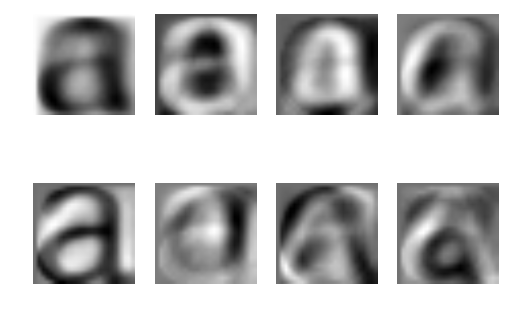

In [25]:
# show some images (mean and 7 first modes)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m,n))
axis('off')
for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m,n))
    axis('off')

Note that the images need to be converted back from the one-dimensional representation using reshape(). Running the example should give eight images in one figure window like the ones in Figure 1.8. Here we used the PyLab function subplot() to place multiple plots in one window.